# 딥러닝 only

In [1]:
def AllinOne():
    print('임포팅...')
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import datasets, preprocessing, model_selection
    import tensorflow as tf
    from tensorflow.keras import datasets, utils
    from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    print('임포팅 complete')
    print('---------------------------------------------------------------------------------------------------')
    print('data...')
    test = pd.read_csv('./FIFA_test.csv')
    train = pd.read_csv('./FIFA_train.csv')
    submission = pd.read_csv('./submission.csv')
    print('data complete')
    print('---------------------------------------------------------------------------------------------------')
    print('OHE...')
    train_OHE = pd.get_dummies(train, columns=["continent", "position", "prefer_foot"])
    print('OHE complete(use train_OHE)')
    print('---------------------------------------------------------------------------------------------------')
    print('feature와 target 나누기')
    x_data = train_OHE.drop(columns=["id", "name", "value", "contract_until"])
    y_data = train_OHE.value
    train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data,test_size=0.3,random_state=0)
    print('트테트테의 결과')
    print(train_data.shape)
    print(test_data.shape)
    print(train_label.shape)
    print(test_label.shape)
    sc = preprocessing.StandardScaler()
    sc.fit(train_data)
    train_data = sc.transform(train_data)
    test_data = sc.transform(test_data)
    print('standardscaler의 결과')
    print(x_data.shape)
    print(y_data.shape)
    print('---------------------------------------------------------------------------------------------------')
    print('layer 나누기')
    model = models.Sequential()

    model.add(layers.Dense(input_dim=16, units=8, activation=None, kernel_initializer=initializers.he_uniform()))
    model.add(layers.Activation('elu'))

    model.add(layers.Dense(units=8, activation=None, kernel_initializer=initializers.he_uniform()))
    model.add(layers.Activation('elu'))

    model.add(layers.Dense(units=8, activation=None, kernel_initializer=initializers.he_uniform()))
    model.add(layers.Activation('elu'))
    model.add(layers.Dropout(rate=0.4))

    model.add(layers.Dense(units=1, activation=None))
    print('layer 과정 완료')
    print('---------------------------------------------------------------------------------------------------')
    print('아담')
    model.compile(optimizer=optimizers.Adam(),
              loss=losses.mean_squared_error,
              metrics=[metrics.mean_squared_error])
    print('아담 완료')
    print('---------------------------------------------------------------------------------------------------')
    print('history에서 epoch 돌리기')
    history = model.fit(train_data, train_label, batch_size=25, epochs=500, validation_split=0.3, verbose=0)
    print('history에서 epoch 완료')
    print('---------------------------------------------------------------------------------------------------')
    result = model.evaluate(test_data, test_label)
    print('loss (mean_squared_error) :', np.sqrt(result[0]))
    print('---------------------------------------------------------------------------------------------------')
    loss = history.history['mean_squared_error']
    val_loss = history.history['val_mean_squared_error']

    x_len = np.arange(len(loss))

    plt.plot(x_len, loss, marker='.', c='blue', label="Train-set loss.")
    plt.plot(x_len, val_loss, marker='.', c='red', label="Validation-set loss.")

    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('Loss(MSE)')
    plt.show()

임포팅...
임포팅 complete
---------------------------------------------------------------------------------------------------
data...
data complete
---------------------------------------------------------------------------------------------------
OHE...
OHE complete(use train_OHE)
---------------------------------------------------------------------------------------------------
feature와 target 나누기
트테트테의 결과
(6252, 16)
(2680, 16)
(6252,)
(2680,)
standardscaler의 결과
(8932, 16)
(8932,)
---------------------------------------------------------------------------------------------------
layer 나누기
layer 과정 완료
---------------------------------------------------------------------------------------------------
아담
아담 완료
---------------------------------------------------------------------------------------------------
history에서 epoch 돌리기
history에서 epoch 완료
---------------------------------------------------------------------------------------------------
84/84 [==============================] - 0s 270u

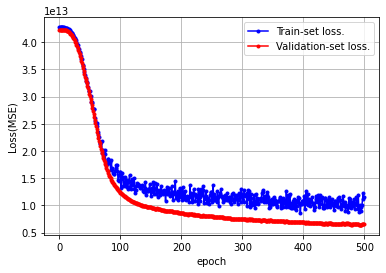

In [10]:
AllinOne()

# 딥러닝 + html 연동

In [1]:
print('임포팅...')
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
print('임포팅 complete')
print('---------------------------------------------------------------------------------------------------')
print('data...')
test = pd.read_csv('./FIFA_test.csv')
train = pd.read_csv('./FIFA_train.csv')
submission = pd.read_csv('./submission.csv')
print('data complete')
print('---------------------------------------------------------------------------------------------------')
print('OHE...')
train_OHE = pd.get_dummies(train, columns=["continent", "position", "prefer_foot"])
print('OHE complete(use train_OHE)')
print('---------------------------------------------------------------------------------------------------')
print('feature와 target 나누기')
Label = train_OHE['value']
InputFeature = train_OHE[["age", "reputation", "stat_overall", "stat_potential", 
               "stat_skill_moves", "continent_africa", "continent_asia", "continent_europe",
               "continent_oceania", "continent_south america", "position_DF", "position_GK",
                "position_MF", "position_ST", "prefer_foot_left", "prefer_foot_right"]]
print('---------------------------------------------------------------------------------------------------')
print('model 만들기')
model = Sequential()
model.add(Dense(5, activation='linear', input_shape=(16,) ))
model.add(Dense(10, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
print('완료')
print('---------------------------------------------------------------------------------------------------')
print('callback')
CP = ModelCheckpoint(filepath='Models/{epoch:03d}-{loss:.4f}-{accuracy:.4f}.hdf5',
            monitor='loss', verbose=1, save_best_only=True, mode='min')

LR = ReduceLROnPlateau(monitor='loss',factor=0.8,patience=3, verbose=1, min_lr=1e-8)

CALLBACK = [CP, LR]
print('callback 완료')
print('---------------------------------------------------------------------------------------------------')
print('model epoch 돌리기')
model.fit(x=InputFeature, y=Label, epochs=100, shuffle=True, batch_size=25, callbacks=CALLBACK)
print('model epoch 완료')

임포팅...
임포팅 complete
---------------------------------------------------------------------------------------------------
data...
data complete
---------------------------------------------------------------------------------------------------
OHE...
OHE complete(use train_OHE)
---------------------------------------------------------------------------------------------------
feature와 target 나누기
---------------------------------------------------------------------------------------------------
model 만들기
완료
---------------------------------------------------------------------------------------------------
callback
callback 완료
---------------------------------------------------------------------------------------------------
model epoch 돌리기
Epoch 1/100
224/358 [=================>............] - ETA: 0s - loss: -267006181376.0000 - accuracy: 0.0000e+00
Epoch 1: loss improved from inf to -1434673872896.00000, saving model to Models/001--1434673872896.0000-0.0000.hdf5
358/358 [===============

358/358 [==============================] - 0s 354us/step - loss: -23277279635308544.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 21/100
303/358 [========================>.....] - ETA: 0s - loss: -26251963247099904.0000 - accuracy: 0.0000e+00
Epoch 21: loss improved from -23277279635308544.00000 to -26302667483512832.00000, saving model to Models/021--26302667483512832.0000-0.0000.hdf5
358/358 [==============================] - 0s 353us/step - loss: -26302667483512832.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 22/100
305/358 [========================>.....] - ETA: 0s - loss: -29597869472219136.0000 - accuracy: 0.0000e+00
Epoch 22: loss improved from -26302667483512832.00000 to -29546016332054528.00000, saving model to Models/022--29546016332054528.0000-0.0000.hdf5
358/358 [==============================] - 0s 350us/step - loss: -29546016332054528.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 23/100
305/358 [========================>.....] - ETA: 0s - loss: -32278216827731968.0000

358/358 [==============================] - 0s 351us/step - loss: -141344023636869120.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 42/100
304/358 [========================>.....] - ETA: 0s - loss: -148530122398367744.0000 - accuracy: 0.0000e+00
Epoch 42: loss improved from -141344023636869120.00000 to -150303926711746560.00000, saving model to Models/042--150303926711746560.0000-0.0000.hdf5
358/358 [==============================] - 0s 351us/step - loss: -150303926711746560.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 43/100
305/358 [========================>.....] - ETA: 0s - loss: -159187293469409280.0000 - accuracy: 0.0000e+00
Epoch 43: loss improved from -150303926711746560.00000 to -159578771148505088.00000, saving model to Models/043--159578771148505088.0000-0.0000.hdf5
358/358 [==============================] - 0s 349us/step - loss: -159578771148505088.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 44/100
307/358 [========================>.....] - ETA: 0s - loss: -16831425359

358/358 [==============================] - 0s 353us/step - loss: -410343924238909440.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 63/100
303/358 [========================>.....] - ETA: 0s - loss: -421513656707055616.0000 - accuracy: 0.0000e+00
Epoch 63: loss improved from -410343924238909440.00000 to -427942638633615360.00000, saving model to Models/063--427942638633615360.0000-0.0000.hdf5
358/358 [==============================] - 0s 353us/step - loss: -427942638633615360.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 64/100
306/358 [========================>.....] - ETA: 0s - loss: -445041521914281984.0000 - accuracy: 0.0000e+00
Epoch 64: loss improved from -427942638633615360.00000 to -445950577512284160.00000, saving model to Models/064--445950577512284160.0000-0.0000.hdf5
358/358 [==============================] - 0s 349us/step - loss: -445950577512284160.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 65/100
304/358 [========================>.....] - ETA: 0s - loss: -46352905402

358/358 [==============================] - 0s 353us/step - loss: -885638268073279488.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 84/100
303/358 [========================>.....] - ETA: 0s - loss: -922882506477273088.0000 - accuracy: 0.0000e+00
Epoch 84: loss improved from -885638268073279488.00000 to -914456536556765184.00000, saving model to Models/084--914456536556765184.0000-0.0000.hdf5
358/358 [==============================] - 0s 352us/step - loss: -914456536556765184.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 85/100
305/358 [========================>.....] - ETA: 0s - loss: -944522132262486016.0000 - accuracy: 0.0000e+00
Epoch 85: loss improved from -914456536556765184.00000 to -943767798566354944.00000, saving model to Models/085--943767798566354944.0000-0.0000.hdf5
358/358 [==============================] - 0s 349us/step - loss: -943767798566354944.0000 - accuracy: 0.0000e+00 - lr: 0.0100
Epoch 86/100
304/358 [========================>.....] - ETA: 0s - loss: -97916904932

In [2]:
model.load_weights("Models/100--1459319248823255040.0000-0.0000.hdf5")

In [3]:
from flask import Flask
from flask import render_template
from flask import request

In [4]:
app = Flask(__name__)

In [5]:
@app.route('/')
@app.route('/saerown')
def ValuePrediction():
    age = request.args.get("age")
    reputation = request.args.get("reputation")
    stat_overall = request.args.get("stat_overall")
    stat_potential = request.args.get("stat_potential")
    stat_skill_moves = request.args.get("stat_skill_moves")
    continent_africa = request.args.get("continent_africa")
    continent_asia = request.args.get("continent_asia")
    continent_europe = request.args.get("continent_europe")
    continent_oceania = request.args.get("continent_oceania")
    continent_south_america = request.args.get("continent_south america")
    position_DF = request.args.get("position_DF")
    position_GK = request.args.get("position_GK")
    position_MF = request.args.get("position_MF")
    position_ST = request.args.get("position_ST")
    prefer_foot_left = request.args.get("prefer_foot_left")
    prefer_foot_right = request.args.get("prefer_foot_right")
       
    if age == None or reputation == None or stat_overall == None or stat_potential == None or stat_skill_moves == None:
        return render_template('saerown.html', Output = '')
    
    Input = pd.DataFrame({
        'age': [ float(age) ],
        'reputation': [ float(reputation) ],
        'stat_overall': [ float(stat_overall) ],
        'stat_potential': [ float(stat_potential) ],
        'stat_skill_moves': [ float(stat_skill_moves) ],
        'continent_africa': [ float(continent_africa) ],
        'continent_asia': [ float(continent_asia) ],
        'continent_europe': [float(continent_europe)],
        'continent_oceania': [float(continent_oceania)],
        'continent_south_america': [float(continent_south_america)],
        'position_DF': [float(position_DF)],
        'position_GK': [float(position_GK)],
        'position_MF': [float(position_MF)],
        'position_ST': [float(position_ST)],
        'prefer_foot_left': [float(prefer_foot_left)],
        'prefer_foot_right': [float(prefer_foot_right)]
        
    })
    ModelOutput = model.predict(Input)[0][0]

    return render_template('saerown.html', Output = ModelOutput)

In [ ]:
app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://10.186.23.29:5000/ (Press CTRL+C to quit)
10.186.23.29 - - [11/Jul/2022 14:11:52] "GET / HTTP/1.1" 200 -
[2022-07-11 14:12:18,037] ERROR in app: Exception on /saerown [GET]
Traceback (most recent call last):
  File "/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/flask/app.py", line 2073, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/flask/app.py", line 1518, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/flask/app.py", line 1516, in full_dispatch_request
    rv = self.dispatch_request()
  File "/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/flask/app.py", line 1502, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**req.view_args)
  File "/var/folders/c4/d406q2cs0jx8y9m35w0pn47w0000gn/T/ipyker